<a href="https://colab.research.google.com/github/jongchurlwon/github_test/blob/main/woncoding_mana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyupbit


     |████████████████████████████████| 103 kB 7.5 MB/s 


In [2]:
import pyupbit

In [3]:
#BTC 최근 200시간의 데이터 불러옴
df = pyupbit.get_ohlcv("KRW-MANA", interval="minute60")
df

,open,high,low,close,volume,value
2021-07-28 04:00:00,785.0,790.0,781.0,784.0,2.012479e+05,1.579841e+08
2021-07-28 05:00:00,786.0,799.0,784.0,795.0,3.191253e+05,2.524359e+08
2021-07-28 06:00:00,795.0,805.0,794.0,798.0,4.897800e+05,3.913730e+08
2021-07-28 07:00:00,797.0,806.0,793.0,802.0,9.513519e+05,7.615764e+08
2021-07-28 08:00:00,802.0,805.0,797.0,804.0,1.268852e+06,1.016801e+09
...,...,...,...,...,...,...
2021-08-05 07:00:00,834.0,839.0,829.0,833.0,1.452921e+06,1.211980e+09
2021-08-05 08:00:00,834.0,840.0,825.0,837.0,1.194316e+06,9.962402e+08
2021-08-05 09:00:00,837.0,854.0,827.0,834.0,4.492425e+06,3.785611e+09
2021-08-05 10:00:00,834.0,837.0,819.0,828.0,2.376439e+06,1.962495e+09


In [4]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2021-07-28 04:00:00,784.0
1,2021-07-28 05:00:00,795.0
2,2021-07-28 06:00:00,798.0
3,2021-07-28 07:00:00,802.0
4,2021-07-28 08:00:00,804.0
...,...,...
195,2021-08-05 07:00:00,833.0
196,2021-08-05 08:00:00,837.0
197,2021-08-05 09:00:00,834.0
198,2021-08-05 10:00:00,828.0


In [5]:
#prophet 불러옴
from fbprophet import Prophet

In [6]:
#학습
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [7]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

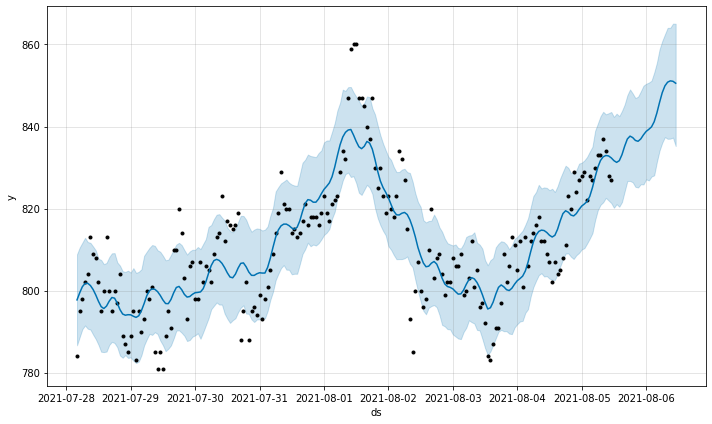

In [8]:
#그래프1
fig1 = model.plot(forecast)

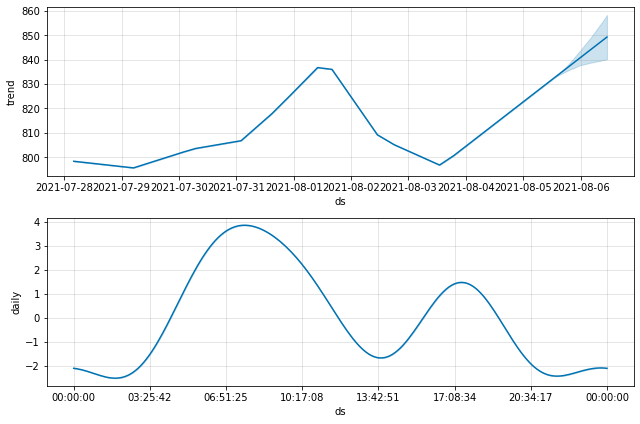

In [9]:
#그래프2
fig2 = model.plot_components(forecast)

In [11]:
#매수 시점의 가격
nowValue = pyupbit.get_current_price("KRW-MANA")
nowValue

830.0

In [13]:
#종가의 가격을 구함

#현재 시간이 자정 이전
closeDf = forecast[forecast['ds'] == forecast.iloc[-1]['ds'].replace(hour=9)]

#현재 시간이 자정 이후
if len(closeDf) == 0:
  closeDf = forecast[forecast['ds'] == data.iloc[-1]['ds'].replace(hour=9)]

#어쨋든 당일 종가
closeValue = closeDf['yhat'].values[0]
closeValue

851.1265709484577

In [14]:
#구체적인 가격
print("현재 시점 가격: ", nowValue)
print("종가의 가격: ", closeValue)

현재 시점 가격:  830.0
종가의 가격:  851.1265709484577


In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-28 04:00:00,798.385877,786.665947,808.851273,798.385877,798.385877,-0.653643,-0.653643,-0.653643,-0.653643,-0.653643,-0.653643,0.0,0.0,0.0,797.732234
1,2021-07-28 05:00:00,798.277146,788.663141,810.499982,798.277146,798.277146,1.178659,1.178659,1.178659,1.178659,1.178659,1.178659,0.0,0.0,0.0,799.455805
2,2021-07-28 06:00:00,798.168415,790.617561,811.672351,798.168415,798.168415,2.790065,2.790065,2.790065,2.790065,2.790065,2.790065,0.0,0.0,0.0,800.958479
3,2021-07-28 07:00:00,798.059684,791.498434,812.874782,798.059684,798.059684,3.693308,3.693308,3.693308,3.693308,3.693308,3.693308,0.0,0.0,0.0,801.752992
4,2021-07-28 08:00:00,797.950953,790.713778,811.842462,797.950953,797.950953,3.828752,3.828752,3.828752,3.828752,3.828752,3.828752,0.0,0.0,0.0,801.779705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-08-06 07:00:00,846.220147,837.422349,862.459766,839.310541,852.775466,3.693308,3.693308,3.693308,3.693308,3.693308,3.693308,0.0,0.0,0.0,849.913455
220,2021-08-06 08:00:00,846.978135,837.002919,864.043565,839.477823,854.096738,3.828752,3.828752,3.828752,3.828752,3.828752,3.828752,0.0,0.0,0.0,850.806887
221,2021-08-06 09:00:00,847.736123,837.035465,864.057807,839.777071,855.424611,3.390448,3.390448,3.390448,3.390448,3.390448,3.390448,0.0,0.0,0.0,851.126571
222,2021-08-06 10:00:00,848.494111,837.291660,865.074369,839.939072,856.817180,2.530221,2.530221,2.530221,2.530221,2.530221,2.530221,0.0,0.0,0.0,851.024332
